# IEEE-14 smart grid recovery process model consider cascading failures

Sanfan Liu, Nov 2024

import libraries

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive/')
%cd drive/My\ Drive/simulator
import pandas as pd

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/simulator'
/content/drive/My Drive/simulator


# Import datasets

D matrix for IEEE-14, in order of Line 1-20, PMU 1-3, FACTS 1-3, DS

In [23]:
D = np.array([[
0,0.8289319249,0.00176056338,0,0,0,0.03139671362,0,0,0.01203051643,0.003227699531,0,0.003521126761,0,0.005868544601,0.02846244131,0,0.004107981221,0,0.0005868544601,0,0,0,0,0,0.07834507042,0
],[0.01598915989,0,0.02520325203,0.00135501355,0.0027100271,0.00298102981,0.0647696477,0.00460704607,0,0.006775067751,0.007046070461,0.00135501355,0.01246612466,0,0.02384823848,0.04742547425,0.00162601626,0.01138211382,0.0008130081301,0.00460704607,0.5601626016,0,0,0,0,0.1967479675,0
],[0,0,0,0.02561366062,0,0.005336179296,0.1270010672,0,0,0,0.007470651014,0,0,0,0.01921024546,0.003201707577,0,0,0,0,0,0.8100320171,0,0,0,0.03628601921,0
],[0,0.001225490196,0.01225490196,0,0,0,0.001225490196,0.007352941176,0,0.02573529412,0,0,0.00612745098,0,0.07230392157,0,0.001225490196,0.02083333333,0.001225490196,0.001225490196,0,0,0.7659313725,0,0,0.06862745098,0
],[0,0,0,0,0,0,0.001398601399,0.001398601399,0,0,0,0,0,0,0,0.001398601399,0,0,0,0,0,0,0,0,0,0,0
],[0,0,0,0.02341597796,0,0,0.001377410468,0.001377410468,0,0.001377410468,0,0,0,0,0,0,0,0.04545454545,0,0,0,0,0,0,0,0.001377410468,0
],[0.1013460016,0,0.06254948535,0.08630245447,0.005542359462,0.01979414093,0,0.003167062549,0.002375296912,0.04117181314,0.01821060966,0.0007917656374,0.005542359462,0,0.01029295329,0.0126682502,0.003167062549,0.009501187648,0,0.02296120348,0,0,0,0,0,0.05621536025,0
],[0.002805049088,0,0,0.001402524544,0,0,0.002805049088,0,0.005610098177,0.002805049088,0,0,0,0,0.001402524544,0.008415147265,0,0,0,0,0,0,0,0,0,0.004207573633,0
],[0,0,0,0,0,0,0.003081664099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
],[0,0,0.01326899879,0,0,0,0.04342581423,0.003618817853,0,0,0.00482509047,0,0,0,0.02412545235,0.01085645356,0.001206272618,0.003618817853,0,0,0,0,0,0,0,0.00482509047,0
],[0,0,0,0.001375515818,0,0,0.001375515818,0,0,0.005502063274,0,0.005502063274,0,0,0.005502063274,0.001375515818,0,0,0,0,0,0,0,0,0,0,0
],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006153846154,0,0,0.001538461538,0,0,0,0,0,0,0
],[0,0,0.008298755187,0.001383125864,0,0,0.006915629322,0,0,0,0.001383125864,0,0,0,0,0.005532503458,0,0,0.008298755187,0,0,0,0,0,0,0,0
],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
],[0,0,0.0009940357853,0.005964214712,0.004970178926,0.03280318091,0.002982107356,0,0,0.0009940357853,0.0009940357853,0,0.01292246521,0,0,0.1153081511,0.03180914513,0,0,0,0,0,0,0,0,0.02087475149,0
],[0,0,0.008865248227,0,0.007978723404,0.001773049645,0.01507092199,0.007978723404,0,0.0008865248227,0.0008865248227,0,0,0,0.03014184397,0,0.00975177305,0,0,0.1019503546,0,0,0,0,0,0.01329787234,0
],[0,0,0.001426533524,0.005706134094,0,0.004279600571,0.007132667618,0,0,0,0.001426533524,0,0,0,0,0,0,0,0,0.007132667618,0,0,0,0,0,0,0
],[0,0,0.001303780965,0,0,0,0.001303780965,0.04172099087,0,0,0,0,0,0,0.00260756193,0.001303780965,0.001303780965,0,0,0.007822685789,0,0,0,0,0,0,0
],[0,0,0,0,0,0.001538461538,0,0,0,0,0,0,0,0,0,0.006153846154,0,0,0,0,0,0,0,0,0,0,0
],[0,0,0,0,0,0,0.001191895113,0,0,0.004767580453,0.001191895113,0,0,0,0.001191895113,0,0,0,0,0,0,0,0,0,0,0.001191895113,0
],[0.3883106485,0,0.004003202562,0,0,0,0.0005337603416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001601281025,0
],[0.006970069701,0.0102501025,0,0.0020500205,0,0,0,0,0,0.009840098401,0.0004100041,0,0,0,0.0004100041,0.0004100041,0,0,0,0.0016400164,0,0,0,0,0,0.0032800328,0
],[0.0008676789588,0.007809110629,0,0,0,0.0004338394794,0.0004338394794,0,0,0.003470715835,0,0,0,0,0.0004338394794,0,0,0.0004338394794,0,0,0,0,0,0,0,0.005206073753,0
],[0.3166666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
],[0.02380952381,0.007738095238,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
],[0.04578313253,0,0.02203098107,0.001032702238,0.01514629948,0.001721170396,0.02719449225,0.0006884681583,0.0006884681583,0.001721170396,0.003786574871,0,0.001376936317,0,0.03580034423,0.01858864028,0.0003442340792,0.001721170396,0,0.006540447504,0,0,0,0,0,0,0
],[0.119047619,0.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
]])

SCI value for each state

In [24]:
# prompt: read numbers from "csi.txt"

def read_numbers_from_file(filename):
    """Reads numbers from a file and returns them as a list."""

    numbers = []
    try:
        with open(filename, 'r') as file:
            for line in file:
                # Attempt to convert each line to a float, skipping lines that don't contain numbers
                try:
                  # Handle potential cases where there might be more than one number or non numeric characters on a line
                  for word in line.split():
                    num = float(word) # will throw an exception if word is not a valid number.
                    numbers.append(num)
                except ValueError:
                    pass # Skip lines that do not contain valid numbers
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return None

    return numbers

# Example usage (replace with the actual path to your file)
sci_values = read_numbers_from_file("csi.txt")


In [25]:
def reward_calculation(X_t):
  tempX = np.zeros(N)
  location = 0
  for i in range(0, N):   #reverse 1 and 0s
    tempX[i] = 1-X_t[i]
  if tempX[26] == 0:    #check if DS is failed
    tempX[25] = 0
    tempX[24] = 0
    tempX[23] = 0
  for i in range(0, 20):  #calculate location for lines
    location = location + 2**((i+3) * tempX[i])

  for i in range(23, 26): # calculate location for FACTS
    location = location + 2**((i-23) * tempX[i])

  return sci_values[int(location)]

**Functions for running the simulation**

In [26]:
#function to calculate the failure propagation from current state to up-coming time step
def Next_state(X_t):
  fail_propagation = np.zeros(N)
  for i in range(0, N):
    if X_t[i] == 1:
      fail_propagation = fail_propagation + D[i]
  for i in range(0, N):
    RV = random.uniform(0,1)
    if fail_propagation[i] > RV:
      X_t[i] = 1
  return X_t

In [27]:
#function to schedule the crew to work on failed components
# note that component index doesnt prefect align with crew's state because crew has to have one extra state for idle
# so for N components, crews has N+1 state and the idling state will always be the (N)th state
# dictionary for all variables used:
#X_t, component-level system state, X_t[i] has 2 states, 0 & 1, 0 operational, 1 failed
#Y_t, crew state, Y_t[i] = the current repair task of crew i (the component crew i is fixing)
#repair_tracker, amount of time left for crew to finish working on the current task
def repair_condition(X_t, Y_t, repair_tracker , repair_counter):
  repair_tracker = repair_tracker - 1
  for i in range(0, M):
    if repair_tracker[i] <= 0:             #find finished repairs
      if Y_t[i]<N:
        X_t[int(Y_t[i])] = 0                     #component got repaired set to operational
      Y_t[i] = N                       #crew set to be idle
  #collect failed components
  fail_list = []
  for i in range(0, N):
    if X_t[i] == 1:               #find failed component
      fail_list.append(i)           #append the failed component into failure list
      for j in range(0, M):
        if i == Y_t[j]:         #if crew is already working on fixing this comonent
          fail_list.pop()     #remove the component from the list
  if fail_list == []:         #end repair scheduling algorithm if nothing to assign
    return (X_t, Y_t, repair_tracker, repair_counter)

  (fail_list, Y_t, repair_tracker, repair_counter) = assign_repair(fail_list, Y_t, repair_tracker, repair_counter)
  return (X_t, Y_t, repair_tracker, repair_counter)

In [28]:
#function to assign repair tasks to idling crews
def assign_repair(fail_list, Y_t, repair_tracker, repair_counter):
  global algorithm
  for i in range(0, M):
    if Y_t[i] == N:   #check for idling crews
      repair_counter = repair_counter + 1
      if not fail_list:  # Check if fail_list is empty
        return (fail_list, Y_t, repair_tracker, repair_counter) # Return immediately if empty
      match algorithm:
        case 0: #randomized method
          random.shuffle(fail_list)     # shuffle fail_list
          Y_t[i] = fail_list[0]         # assign the first component to idling crew
          repair_tracker[i] = repair_time[fail_list[0]] #assign repair time to coresponding tracker
          fail_list.pop(0)              #remove component from the fail list
        case 1: #pre_computed list
          global pre_list               #fetch pre-computed list
          for j in range(0, len(pre_list)):
            for k in range(0, len(fail_list)):
              if pre_list[j] == fail_list[k]:   #search the first component on the list
                Y_t[i] = pre_list[j]            #assign crew to the component
                repair_tracker[i] = repair_time[pre_list[j]]  #assign repair time
                fail_list.pop(k)                #remove from the list
                break                           #break k loop
                break                           #break j loop
        case 2: #look ahead
          best_component = fail_list[0] #fetch first component on the list
          if len(fail_list) > 1:      #if only 1 component, then skip comparision
            X_u = np.copy(X_t)
            X_u[best_component] = 0   #assume first component is repair
            best_reward = (reward_calculation(X_t) - reward_calculation(X_u)/repair_time[best_component]) #find the performance when its repaired
            for j in range(1, len(fail_list)):    #for the rest of components on the list
              X_v =  np.copy(X_t)
              X_v[fail_list[j]] = 0   #assume jth component is fixed
              temp_reward = (reward_calculation(X_t) - reward_calculation(X_v)/repair_time[fail_list[j]]) #find its reward after its fixed
              if temp_reward > best_reward:      #compare the performance gap
                best_reward = temp_reward        #keep the better performance
                best_component = fail_list[j]     # keep the better component
          Y_t[i] = best_component   #assign the best component to repair crew
          repair_tracker[i] = repair_time[best_component] #assign repair time
          fail_list.remove(best_component) #remove from the list
        case 3: #dynamic dependency
          best_component = fail_list[0] # fetch first component from the list
          if len(fail_list) > 1:        #if there is more than one failed component
            highest_effect=0
            for k in range(0, N):
              if X_t[k] == 0:
                highest_effect = highest_effect + D[best_component][k]
            highest_effect = highest_effect / repair_time[best_component] #find the dependency effect caused by best_component
            for j in range(1, len(fail_list)):  #compare with other components
              temp_effect = 0
              for k in range(0, N):
                if X_t[k] == 0:
                  temp_effect = temp_effect + D[fail_list[j]][k]    #find the dependency effect caused by fail_list[j]
              temp_effect = temp_effect / repair_time[fail_list[j]]  #find the dependency effect caused by testing component
              if temp_effect > highest_effect:
                highest_effect = temp_effect
                best_component = fail_list[j]
          Y_t[i] = best_component   #assign the best component to repair crew
          repair_tracker[i] = repair_time[best_component] #assign repair time
          fail_list.remove(best_component) #remove from the list
        case _: #handle invalid algorithms
          print("invalid algorithm")
          sys.exit()

  return (fail_list, Y_t, repair_tracker, repair_counter)

# Input

In [29]:
N = 27
M = 4                       #number of crews
Max_sim_time = 100         #max simulation time
sim_trials = 1000           #number of trials we are going to run
#choose repair algorithm
algorithm =  1              #0-randomized, 1-pre-computed list, 2-look-ahead, 3-dynamic dependency
#pre_list = np.array([2, 0, 1, 3, 6, 20, 23, 14, 15, 25, 26,  9,  5, 17, 21, 12, 24,  7, 16, 10, 22, 19, 18, 11, 4,  8, 13])     # a fixed prority for pre-computed list
pre_list = np.array([13,  8,  4, 11, 18, 19, 22, 10, 16,  7, 24, 12, 21, 17,  5,  9, 26, 25, 15, 14, 23, 20,  6,  3,  1,  0,  2])
repair_time = np.zeros(N)
random.seed(0)
for i in range(0, 19):      # setup repair time for Lines
    repair_time[i] = random.randint(2, 4)    #7~10 hours used in Yan's work
for i in range(19, 23):      # setup repair time for PMU
    repair_time[i] = random.randint(3, 7)
for i in range(23, 26):      # setup repair time for FACTS
    repair_time[i] = random.randint(3, 7)
    #setup repair time for DS
repair_time[N-1] = random.randint(3, 7)

In [30]:
print(repair_time)

[3. 3. 2. 3. 4. 3. 3. 3. 3. 3. 4. 2. 4. 2. 3. 2. 2. 4. 3. 7. 7. 4. 5. 3.
 3. 5. 6.]


Run simulation

In [31]:
result = np.zeros( Max_sim_time)
repair_attemp_record = np.zeros(200)
average_Performance = np.zeros(Max_sim_time)
total_repair_attemp = 0
for failure in range(0, N):
  failure_case = np.zeros(N)
  failure_case[failure] = 1
  print(failure)
  for trial in range(0, sim_trials+1):
    random.seed(trial)
    np.random.seed(trial)
    systemPerformance =  np.ones(Max_sim_time)
    repair_counter = 0
    X_t = np.copy(failure_case)    #smart grid state at current time
    Y_t = np.zeros(M)     #crew state at current time
    for i in range(0, M):
      Y_t[i] = N
    repair_tracker = np.zeros(M)   # repair time tracker
    t=0   #current time
    while((sum(X_t) != 0) and (t < Max_sim_time-1) ):
      (X_t, Y_t,  repair_tracker, repair_counter) = repair_condition(X_t, Y_t, repair_tracker, repair_counter)
      X_t = Next_state(X_t)
      t = t + 1
      systemPerformance[t] = reward_calculation(X_t)# work on finding system performance

    result[t] = result [t] +1
    total_repair_attemp = total_repair_attemp + repair_counter;
  average_Performance = average_Performance + systemPerformance

average_Performance = (average_Performance / failure) / 1.0384615384615383

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


Organize results

In [32]:
print(total_repair_attemp/(N*sim_trials) -1)  #find number of cascading failures

14.697555555555555


In [33]:
repair_duration = 0         #find average repair time in hours
for i in range(0, Max_sim_time):
  repair_duration = repair_duration + result[i] * i
print(repair_duration / sim_trials / N)

14.101666666666667


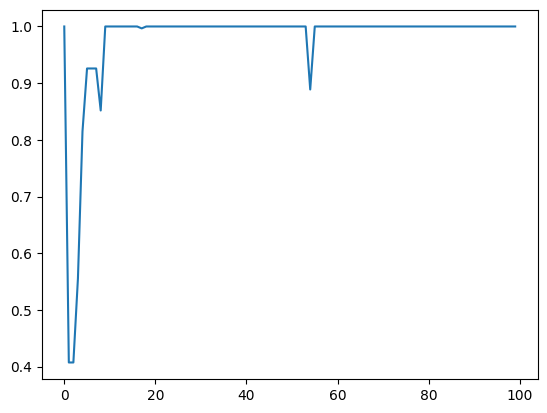

In [34]:
plt.plot(average_Performance)
plt.show()

#For reference only

Randomized

In [35]:
def randomized(X_t):
  list_Failure = []
  for i in range(0, N):
    if X_t[i] == 1:
      list_Failure.append(i)
  random.shuffle(list_Failure)
  if list_Failure == []:
    return 0
  return list_Failure[0]+1

pre-computed repair priorities based on cascading effect

In [36]:
def pre_computed(X_t):
  for i in range(0, len(X_t)):
    if X_t[pre_list[i]] == 1:
      return pre_list[i]+1
  return 0

Look-ahead

In [37]:
def look_ahead(X_t):
  best_component = 0
  best_reward = 1
  X_u = X_t
  X_v = X_t
  current_reward = reward_calculation(X_v)
  for i in range(0, N):
    if X_t[i] == 1:
      X_u[i] = 0
      temp_reward = reward_calculation(X_u)
      if temp_reward > current_reward:
        current_reward = temp_reward
        best_component = i
  return best_component+1

dynamic cascading effect

In [38]:
def cascading_effect(X_t):
  best_component = 0
  highest_effect = 0
  for i in range(0, N):
    if X_t[i] == 1:
      temp_effect = 0
      for j in range(0, N):
        if X_t[j] == 0:
          temp_effect += D[i][j]
      if temp_effect > highest_effect:
        highest_effect = temp_effect
        best_component = i
  return best_component+1

In [39]:
arr = np.zeros(len(D))
for i in range(0, len(D)):
  arr[i] =(D[i].sum())
print(arr)
ascending_indices = arr.argsort()
descending_indices = ascending_indices[::-1]
print(ascending_indices)

[0.99823944 0.99186992 1.03415155 0.98529412 0.0041958  0.07438017
 0.46159937 0.02945302 0.00308166 0.10977081 0.02063274 0.00769231
 0.03181189 0.         0.2306163  0.19858156 0.02710414 0.05736636
 0.00769231 0.00953516 0.39444889 0.03526035 0.01908894 0.31666667
 0.03154762 0.18416523 0.16904762]
[13  8  4 11 18 19 22 10 16  7 24 12 21 17  5  9 26 25 15 14 23 20  6  3
  1  0  2]


for running a single trial in case L1 fails

In [40]:
result = np.zeros( Max_sim_time)
repair_attemp_record = np.zeros(200)
average_Performance = np.zeros(Max_sim_time)
total_repair_attemp = 0
for failure in range(0, 1):
  failure_case = np.zeros(N)
  failure_case[failure] = 1
  print(failure)
  for trial in range(0, 1):
    random.seed(trial)
    np.random.seed(trial)
    systemPerformance =  np.ones(Max_sim_time)
    repair_counter = 0

    X_t = np.copy(failure_case)    #smart grid state at current time
    Y_t = np.zeros(M)     #crew state at current time
    for i in range(0, M):
      Y_t[i] = N
    repair_tracker = np.zeros(M)   # repair time tracker
    t=0   #current time
    while((sum(X_t) != 0) and (t < Max_sim_time-1) ):
      print(X_t, Y_t, repair_tracker)
      (X_t, Y_t,  repair_tracker, repair_counter) = repair_condition(X_t, Y_t, repair_tracker, repair_counter)
      X_t = Next_state(X_t)
      t = t + 1
      systemPerformance[t] = reward_calculation(X_t)# work on finding system performance

  result[t] = result [t] +1
  average_Performance = average_Performance + systemPerformance
  total_repair_attemp = total_repair_attemp + repair_counter;

average_Performance = (average_Performance / N) / 1.0384615384615383

0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.] [27. 27. 27. 27.] [0. 0. 0. 0.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.] [ 0. 27. 27. 27.] [ 3. -1. -1. -1.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0.] [ 0.  1. 27. 27.] [ 2.  3. -2. -2.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0.] [ 0.  1. 25. 27.] [ 1.  2.  5. -3.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0.] [20.  1. 25. 27.] [ 7.  1.  4. -4.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0.] [20. 27. 25. 27.] [ 6.  0.  3. -5.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0.] [20. 27. 25. 27.] [ 5. -1.  2. -6.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0.] [20.  0. 25. 27.] [ 4.  3.  1. -7.]
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.